## Linear Regression Project

An ecomemrce company is trying to decide whether to focus their efforts on their mobile app experience or their website.
Analyze the best approach using the data given.


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The customer data set

In [34]:
customers = pd.read_csv("Ecommerce Customers")

In [35]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [36]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [37]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Analysing the data
Lets compare time spent on app vs time spent on website and how yearly amount spent correlates to them

In [38]:
sns.set_palette("RdBu_r",7)
sns.set_style("whitegrid")

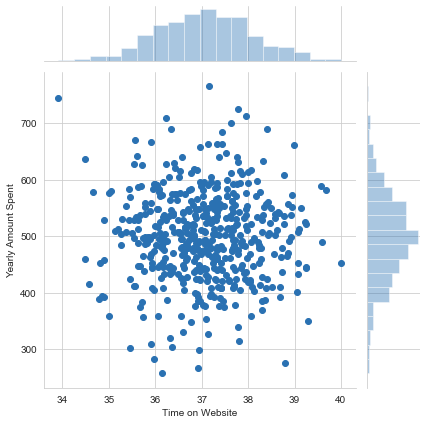

In [39]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

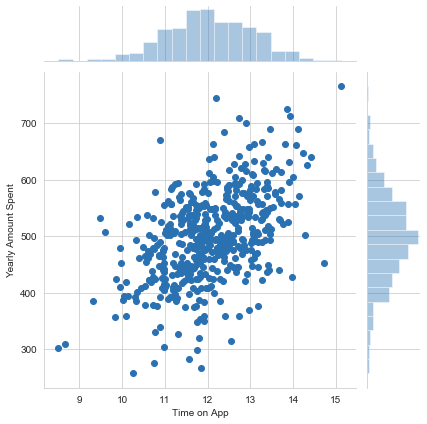

In [40]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

As we can see, people spend less time on the app and spend roughly the same amount. Lets analyse the data further.

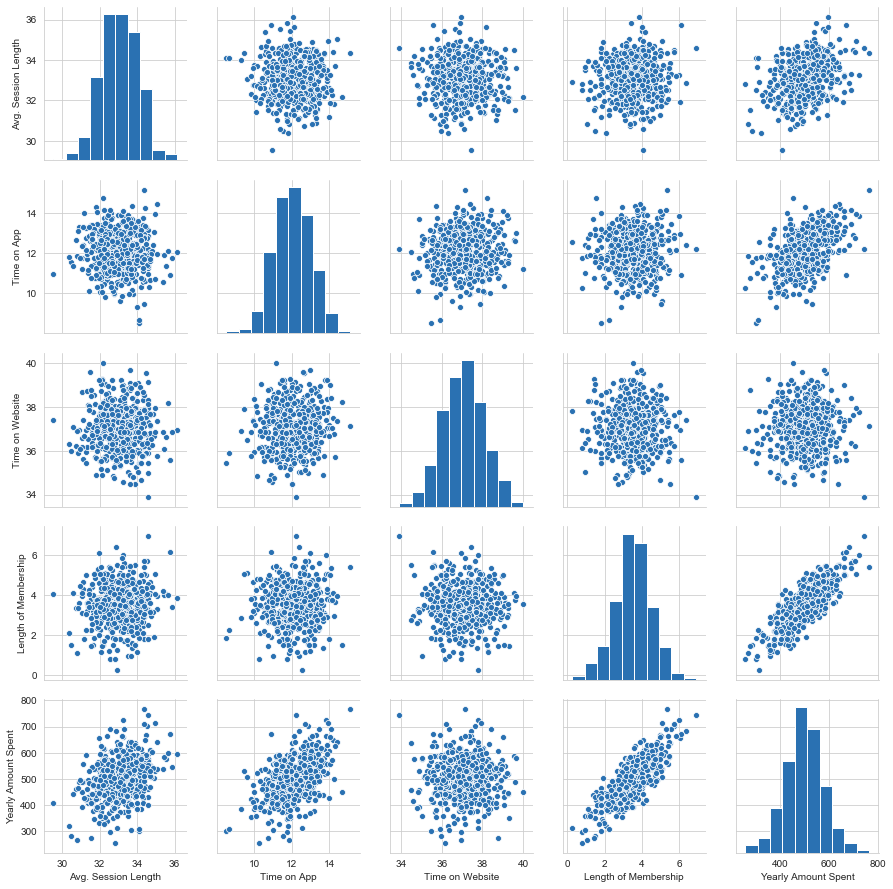

In [41]:
sns.pairplot(customers)

The best correlation we can see is in Yearly amount spent to Length of membership plot

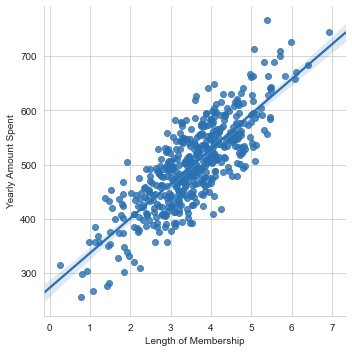

In [42]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

# Training and testing our model

In [43]:
x = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [44]:
y = customers['Yearly Amount Spent']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Training the model

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [47]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("Coeffecients are : ", lm.coef_)

Coeffecients are :  [25.98154972 38.59015875  0.19040528 61.27909654]


## Testing the model

In [49]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'Predicted Y')

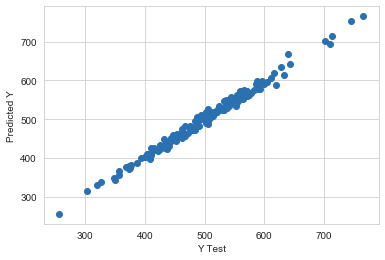

In [50]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the model

In [31]:
from sklearn import metrics 

print('MAE : ', metrics.mean_absolute_error(Y_test,predictions))
print('MSE : ', metrics.mean_squared_error(Y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE :  7.228148653430853
MSE :  79.81305165097487
RMSE: 8.933815066978656


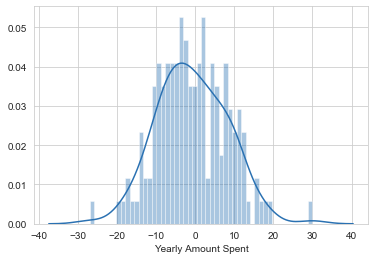

In [32]:
#Residuals 
sns.distplot((Y_test-predictions),bins=50);

The histogram looks normally distributed, that means our model has a good fit.

## Conclusion

In [30]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Interpreting coeffecients 
A 1 unit increase in (lets say) Time on app is assosciated with an increase of 38.590159 dollars for the company.

Similarly a 1 unit increase in Time on website is assosciated with an increase of 0.190405 dollars for the company

## Results
As we can see from the coeffecients, the app gives the company a lot more returns as compared to the website, therefore the company should invest more on their app.